<a href="https://colab.research.google.com/github/lonespear/MA206/blob/main/Lesson_14_Two_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('faraway')
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘crosstalk’, ‘lazyeval’, ‘DT’, ‘gridExtra’, ‘palmerpenguins’, ‘plotly’, ‘rpart.plot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Rdpack’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lme4’




In [ ]:
library(tidyverse)
library(faraway)
data(wcgs)
wbc <- read_csv("https://raw.githubusercontent.com/lonespear/MA206/main/wisconsin_breast_cancer.csv")
ranger <- read_csv("https://raw.githubusercontent.com/lonespear/MA206/main/ranger_school.csv")

New names:
• `` -> `...33`
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 568 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): diagnosis
dbl (31): id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothne...
lgl  (1): ...33

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 289 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): State
dbl (26): Record Number, mdl_raw, mdl_points, spr_raw, spr_points, hrpu_raw,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Lesson 14: Two Means and the Two-Sample T-Test

Last lesson we discussed how to compare two proportions to test for a significant difference.

Today we will extend this to quantitative variables building from our knowledge of the one-sample t-test.

### 1. Ask a research question
*For example:* Is there a difference in the mean 12-mile ruck time for someone who passes Ranger School compared to someone who did not?

### 2. Write your null and alternative hypotheses:
Let $\mu_1$ be the mean ruck time for those who **pass** Ranger School, and $ \mu_2$ be the mean ruck time for those who **fail**.

- **Null Hypothesis $H_0$**: $ \mu_1 - \mu_2 = 0 $ (No difference in mean ruck times)
- **Alternative Hypothesis $H_A$**: $ \mu_1 - \mu_2 \neq 0 $ (There is a difference in mean ruck times)

### 3. Explore the data and find your observed statistics:
We will use the difference in our sample means as our observed statistic.

- **Observed Statistic**:
  $\bar{x}_1 - \bar{x}_2$
- **Standardize your Observed Statistic**: $ t = \frac{(\bar{x}_1 - \bar{x}_2) - \mu_{null}}{SD_{null}} $

In our hypothesis statements we are assuming no diffference, so $\mu_0 = 0$. The formula for standard deviation of our null distribution is $ \sqrt{\frac{s_1^2}{n_1^2} + \frac{s_2^2}{n_1^2}} $.

Putting that all together our standardized statistic becomes:

$$
 t = \frac{(\bar{x}_1 - \bar{x}_2)}{\sqrt{\frac{s_1^2}{n_1^2} + \frac{s_2^2}{n_1^2}}}
$$

### 4. Interpret your strength of evidence:
 We obtain a p-value the same way as in a one-sample t-test. We have converted our observed statistic into a standardized value that is in units of standard deviations away from the null distribution.

For a two-sided hypothesis test like this example is using:

$$
\begin{align*}
p-value &= 2 \cdot \mathbb{P}(T > |t|) = 2 \cdot \int_{|t|}^\infty f_T(x) dx \\
&= 2 \cdot (1 - pt(|t|)) \ \ \ \ \text{R code}
\end{align*}
$$

### On Confidence Intervals:
For a difference in means we use the same basic formula as the other three tests, except using our observed statistic for this test, the difference of sample means, and the respective SE formula which is identical to the $SD_{NULL}$ like in the one-sample t-test:

$$
\begin{align*}
\text{Statistic} &\pm \text{Margin of Error} \\
\text{Statistic} &\pm M \cdot SE \\
(\bar{x}_1 - \bar{x}_2) &\pm t_{n-2, 1-\alpha/2} \cdot \sqrt{\frac{s_1^2}{n_1^2} + \frac{s_2^2}{n_1^2}}
\end{align*}
$$

The "M" (multiplier) turned into the critical value for the t-distribution at the respective $\alpha$-level of significane. The R-code you will use for this is `qt(1-sig_level/2, n-2)`. Notice the degrees of freedom (df) is no longer (n-1). This is due to us having to estimate another parameter in our standard deviation calculation, (ie we are estimating two variances now whereas before we were only estimating one).

## Example 1: Ranger School Success and 12 Mile Ruck Times

We have a dataset of a ranger school class that started RAP week together, and aggregated all phyiscal performance stats they had prior to attending from their unit. The last column is whether they passed or failed (Binary) encoded as a `1` or a `0`.

In [ ]:
ranger %>% head

Record Number,mdl_raw,mdl_points,spr_raw,spr_points,hrpu_raw,hpru_points,sdc_raw,sdc_points,plk_points,⋯,acft_points,rpa_points,ruck_min,age,hgt_in,wt_lb,bmi,State,gender,Ranger_tab
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,240,78,8,75,42,82,87,100,100,⋯,535,364,135,28,71,170,23,AK,1,1
2,340,100,11,93,41,81,92,100,94,⋯,557,331,136,21,71,242,32,AK,1,1
3,170,64,5,62,10,60,103,80,60,⋯,413,327,182,26,67,148,23,AK,0,1
4,260,82,9,79,25,67,99,98,76,⋯,490,322,129,28,74,189,23,NA,1,1
5,340,100,10,83,53,93,84,100,100,⋯,576,375,130,28,70,180,25,AR,1,1
6,300,90,12,97,44,84,78,100,94,⋯,565,367,123,28,69,184,26,AR,1,1


Let's visualize their ruck times in a histogram categorized by pass/fail.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


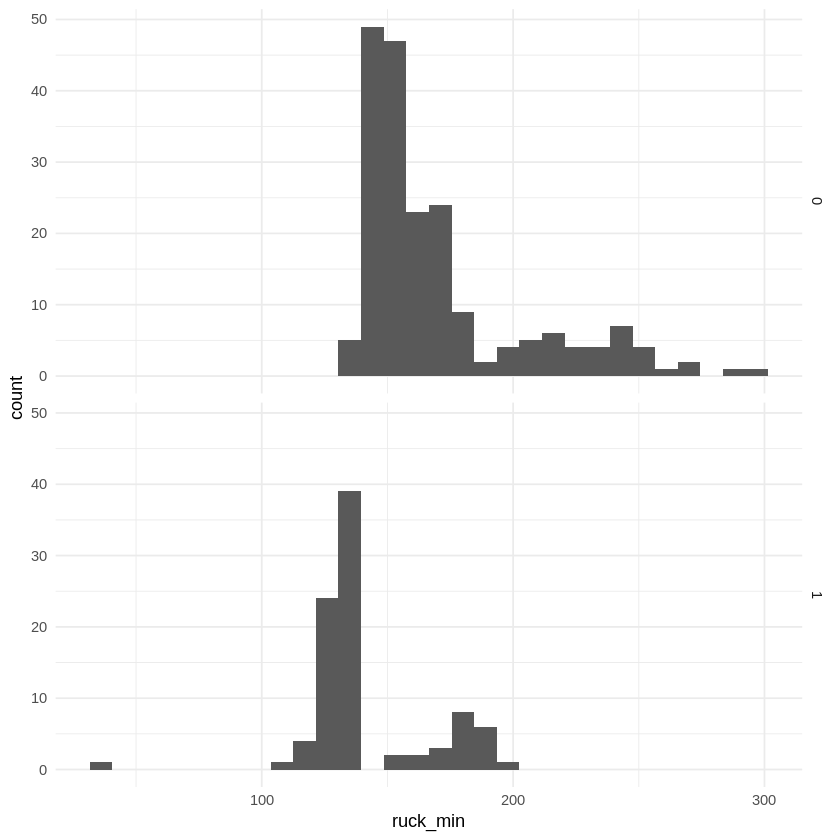

In [ ]:
ranger %>% ggplot(aes(x=ruck_min)) + geom_histogram() + facet_grid(Ranger_tab ~ .) + theme_minimal()

Questions may arise about skewness and indeed they are well received. If this is the only data we have on hand this needs to be mentioned in our conclusions from conducting a two-sample test. Remember, with larger sample sizes by the Central Limit Theorem our distribution of sample means will still achieve normality, so a two-sample test could still be used in those circumstances. But how large is large remains the question to be answered. In practice, if I am worried about validity conditions, I would use a non-parametric approach however this is beyond the scope of the course.

### Find our observed statistic:

In [ ]:
ranger %>%
  group_by(Ranger_tab) %>%
  summarize(mean = mean(ruck_min),
            s = sd(ruck_min),
            n = n())

Ranger_tab,mean,s,n
<dbl>,<dbl>,<dbl>,<int>
0,170.6414,34.28794,198
1,140.6923,24.28840,91


**VALIDITY CONDITIONS FOR A TWO-SAMPLE T-TEST ARE THERE ARE 20 OBSERVATIONS IN EACH GROUP AND THE DATA IS NOT STRONGLY SKEWED**

From the above I have everything I need to execute the two-sample t-test:

In [ ]:
null = 0      #Enter the value of your Null Hypothesis Parameter
xbar_1 = 170.64    # sample mean of group 1
xbar_2 = 140.69   # sample mean of group 2
s_1 =  34.28     # sample standard deviation of group 1
s_2 = 24.289      # sample standard deviation of group 2
n_1 =  198     # sample size of group 1
n_2 =  91     # sample size of group 2
n = n_1 + n_2   # total sample size
diff = xbar_1 - xbar_2
sd = sqrt(s_1^2/n_1 + s_2^2/n_2)
t = (diff-null)/sd   ; t # standardized statistic

[1] 8.499073

In [ ]:
pvalue = 2*(1-pt(abs(t), n-2)) ; pvalue

[1] 1.110223e-15

In [ ]:
siglevel = 0.05             #Enter your significance level (alpha)
multiplier = qt(1-siglevel/2, n-2)
se = sqrt(s_1^2/n_1 + s_2^2/n_2) # standard error
CI = c(diff-multiplier*se, diff+multiplier*se) ; CI # confidence interval

[1] 23.01401 36.88599

**Conclusion** \\
With a p-value of 1.11e-15 we have extremely strong evidence to reject the null hypothesis that there is no difference in average ruck times for those that pass and fail ranger school. We are 95% confident the true difference in ruck times for those that pass and fail ranger school is between (23.01, 36.89) minutes.

### Example 1.1: You try
With a partner, test if there is a significant difference in the average height of a ranger student that passes and fails ranger school.

Write your hypotheses statements:

$H_0$:

$H_A$:

1. Visualize the data you are going to test

2. Tabulate the data to calculate your summary statistics

3. Find your t-statistic

4. Find your p-value

5. Create a confidence interval

**State your conclusions:**

## Example 2: Coronary Heart Disease and Cholesterol

Heart disease is the leading cause of death in the country. An attributing factor is high cholesterol. Let us investigate the following dataset `wcgs` and test the significance between average cholesterol levels between patients with and without CHD.

Warning message:
“Removed 12 rows containing non-finite outside the scale range (`stat_bin()`).”


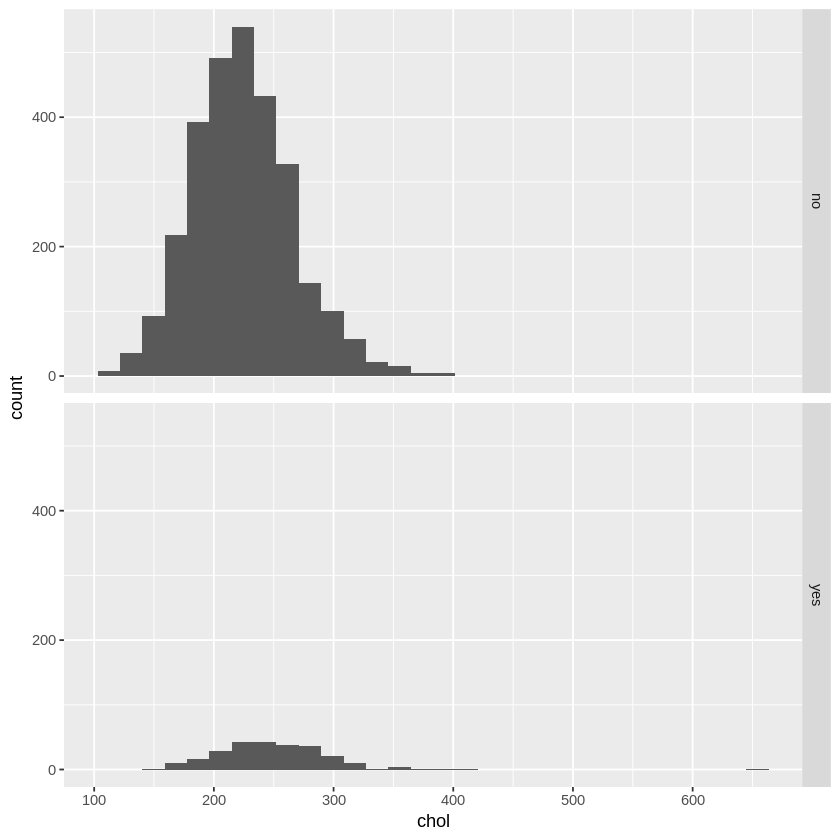

In [ ]:
wcgs %>% ggplot(aes(x=chol)) + geom_histogram(bins=30) + facet_grid(chd ~ .)

## Example 2.1 Cigarettes and CHD

Test whether the average number of cigarettes smoked per ______(figure out the units of `cigs` by typing `help(wcgs)`) is significantly different from people with CHD and people without CHD.

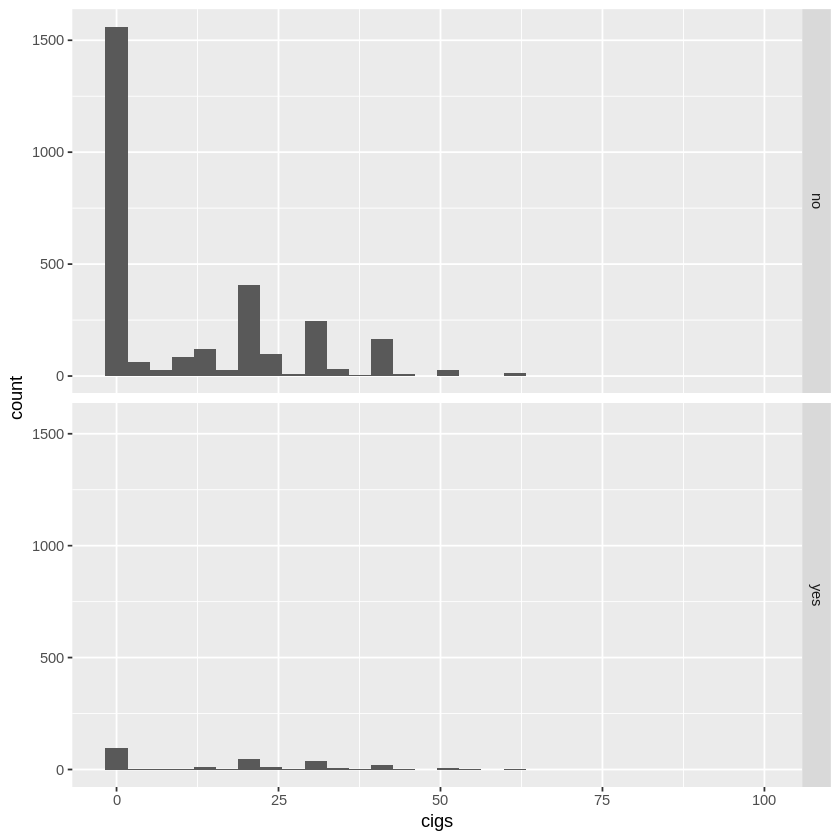

In [ ]:
wcgs %>% ggplot(aes(x=cigs)) + geom_histogram(bins=30) + facet_grid(chd ~ .)

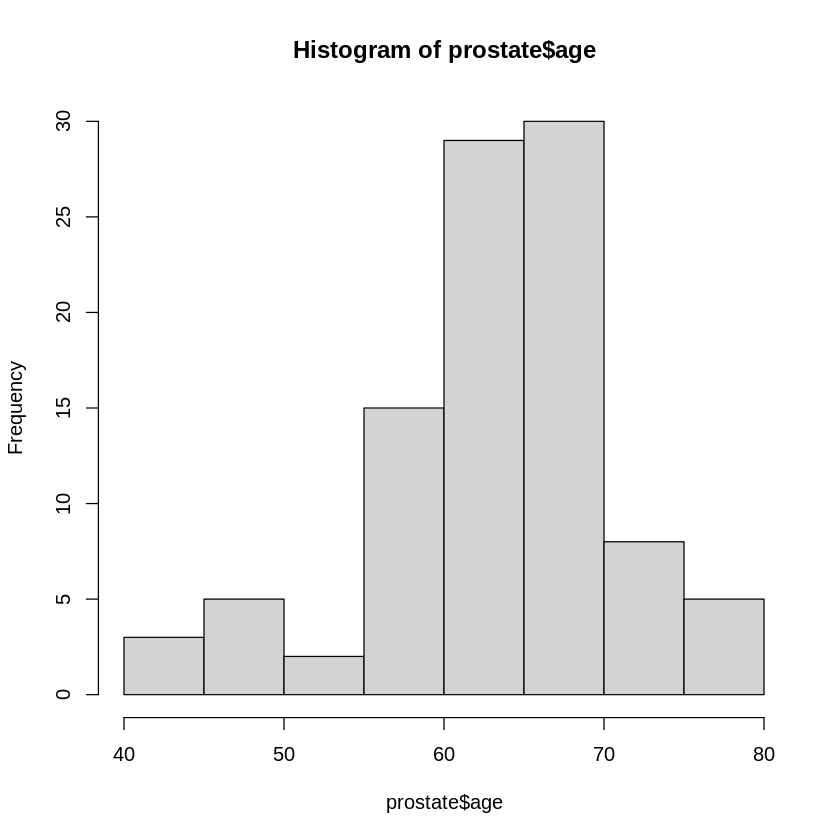

In [ ]:
hist(prostate$age)

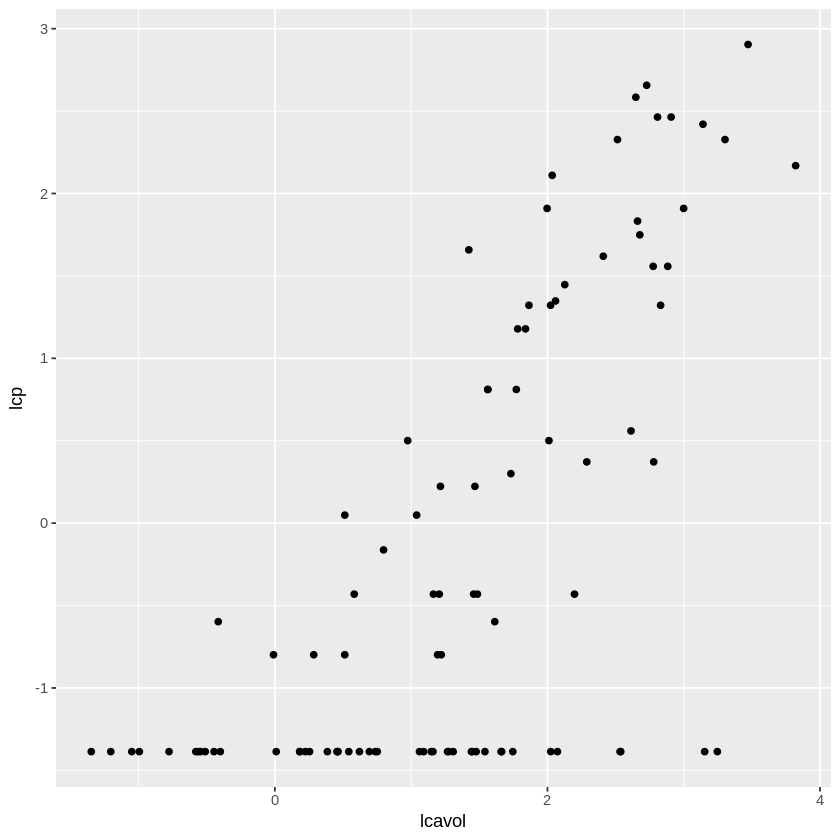

In [ ]:
prostate %>% ggplot(aes(x=lcavol, y=lcp)) + geom_point()

In [ ]:
prostate %>% group_by(svi) %>% summarise(mean = mean(age))

svi,mean
<int>,<dbl>
0,63.40789
1,65.52381


## Challenge: Wisconsin Breast Cancer Dataset

The `wbc` is a well known breast cancer dataset that describes many benign and malignant tumors studied in the breast.

In [ ]:
wbc %>% head

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,...33
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NA
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NA
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NA


Use the below visualization to identify a variable that may appear different based on malignant vs. benign.

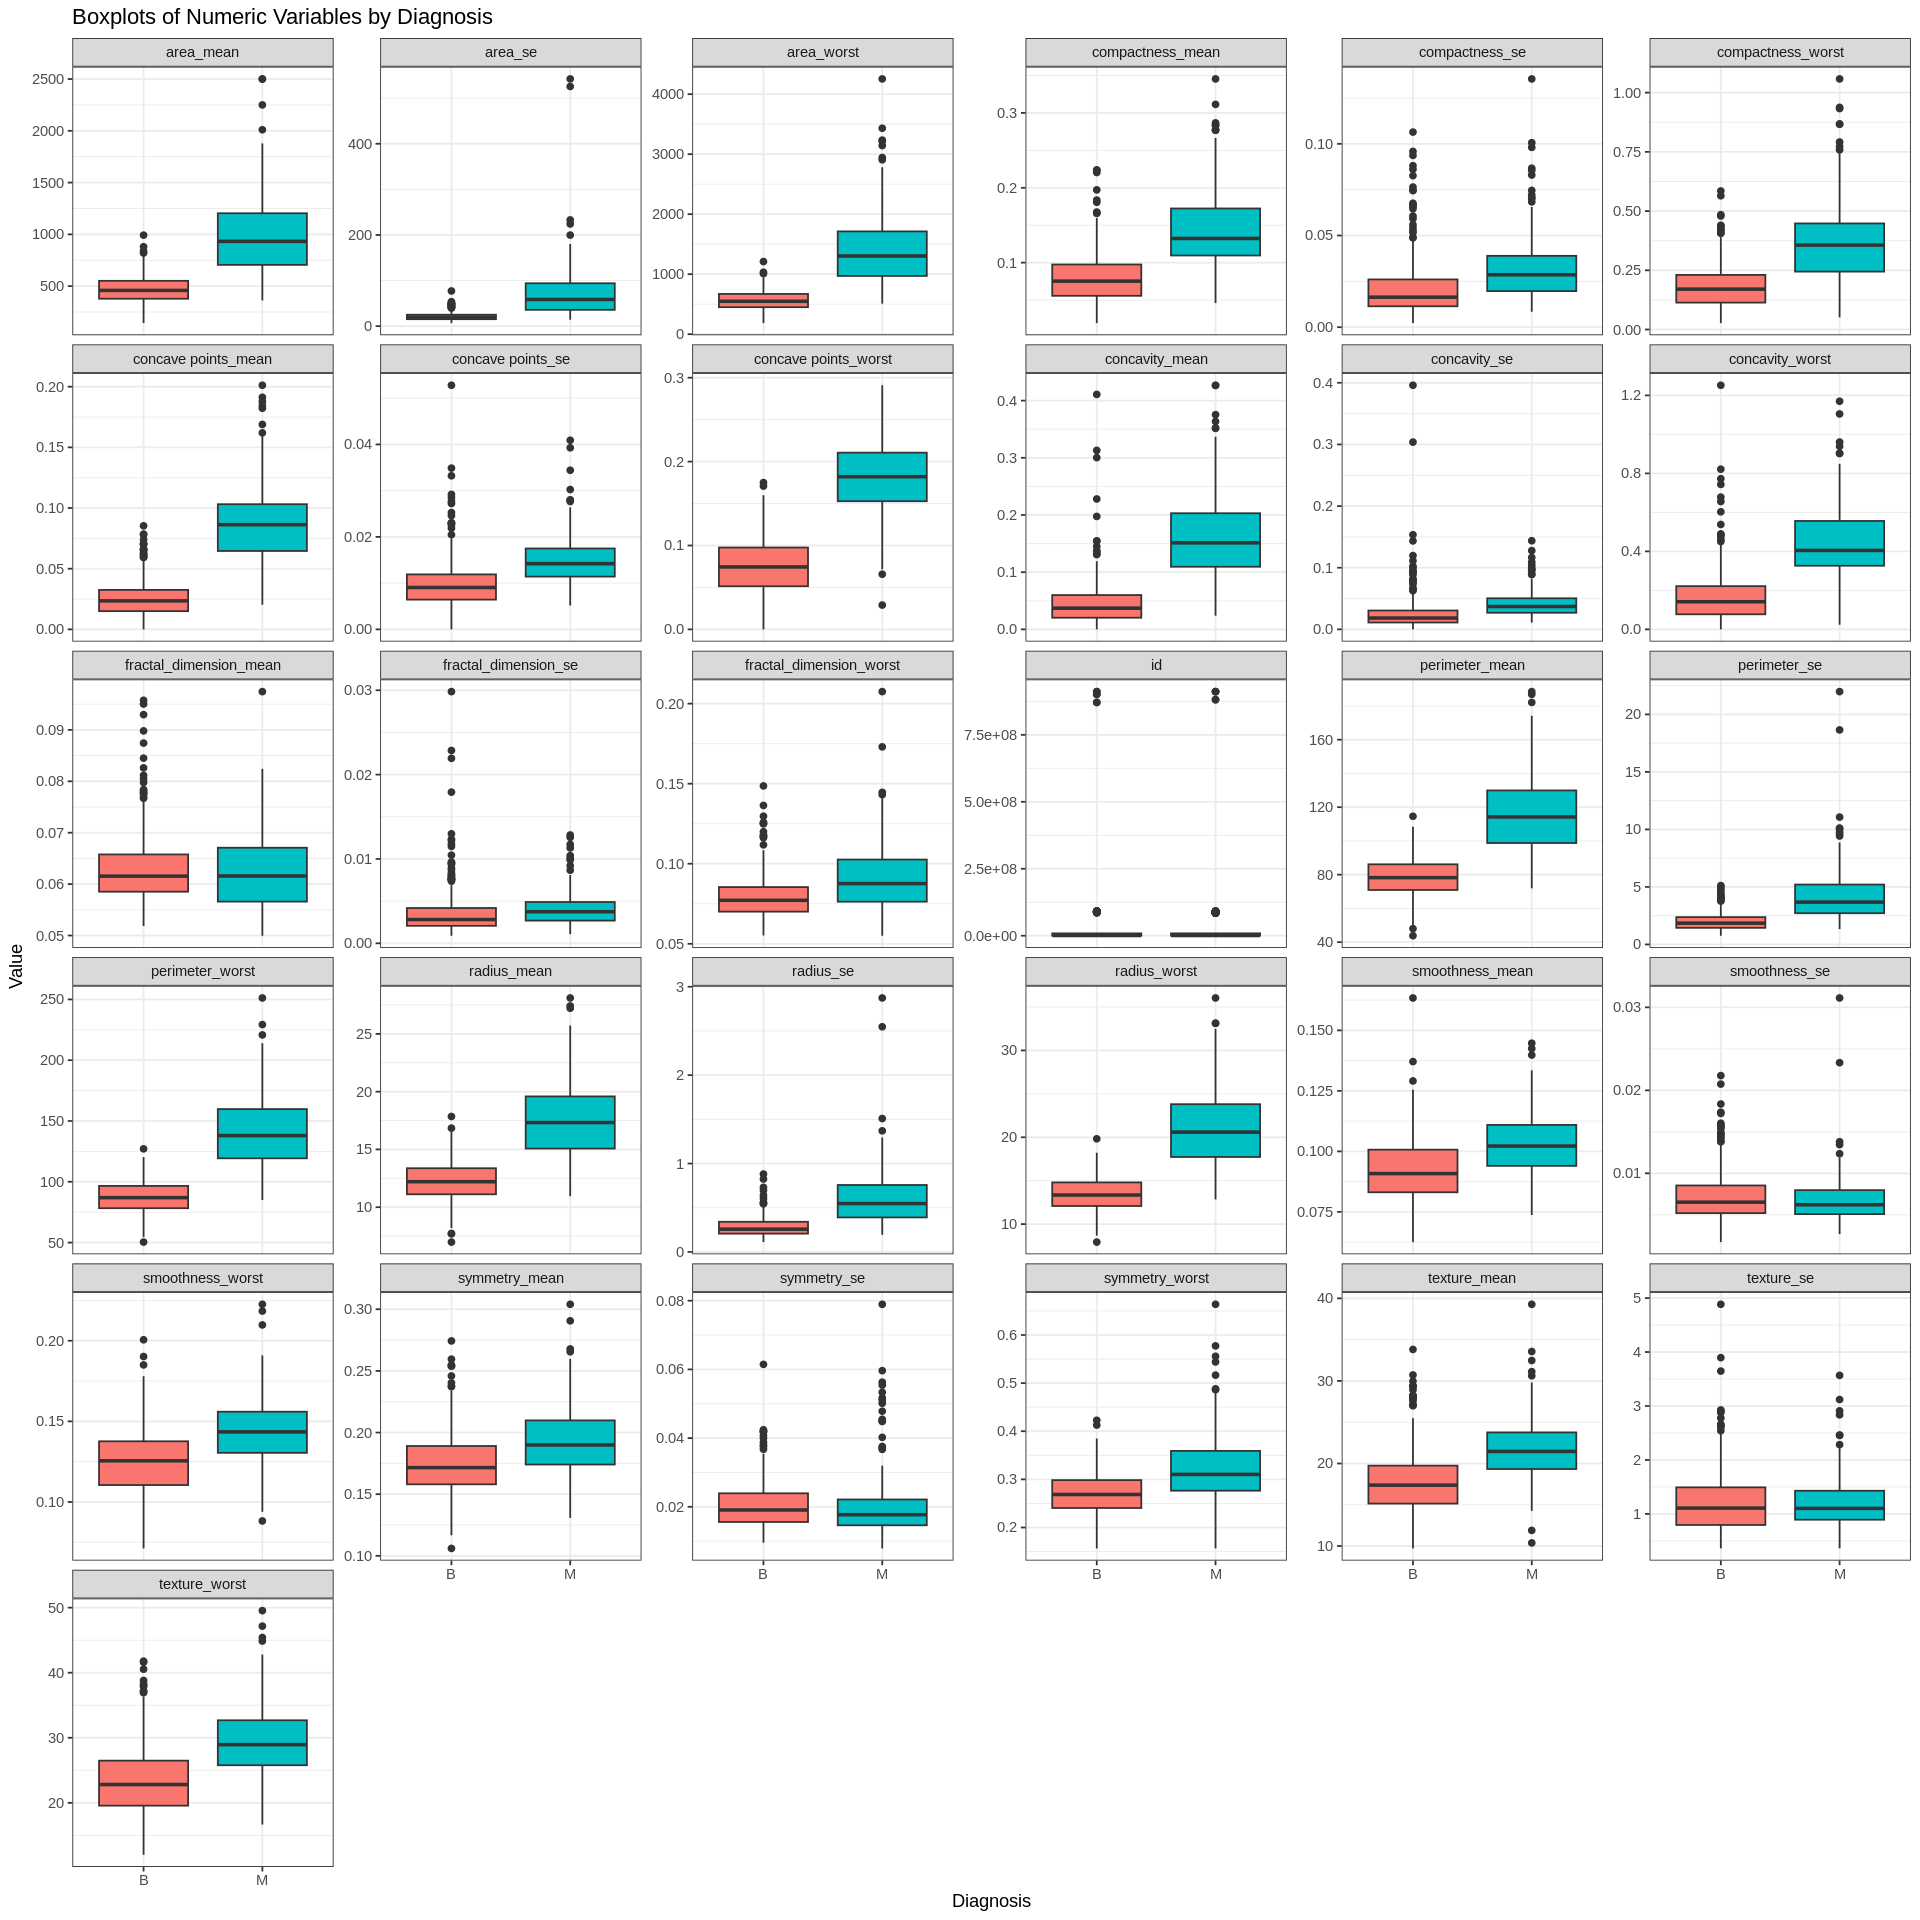

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 16)
# Pivot the numeric variables into long format
wbc_long <- wbc %>%
  pivot_longer(
    cols = where(is.numeric),
    names_to = "variable",
    values_to = "value"
  )

# Create the boxplot faceted by variable, with diagnosis on the x-axis
ggplot(wbc_long, aes(x = diagnosis, y = value, fill = diagnosis)) +
  geom_boxplot() +
  facet_wrap(~ variable, scales = "free_y") +
  labs(title = "Boxplots of Numeric Variables by Diagnosis",
       x = "Diagnosis",
       y = "Value") +
  theme_bw() +
  theme(legend.position = "none")

Formally test whether your 'hunch' is significant.